# Loan Data
Este conjunto de datos se llama "Datos de préstamos" y tiene más de 9.500 préstamos con información sobre cómo se estructuró el préstamo, quién lo solicitó y si lo pagó en su totalidad. Esta información fue obtenida de LendingClub.com, una empresa que conecta a personas que desean pedir prestado dinero con inversores.


 En este proyecto vamos a utilizar los Datos de Préstamos para construir el proyecto de ciencia de datos en base a ellos. Mira, ChatGPT hace el 80 por ciento del trabajo aquí, nosotros sólo tenemos que ser buenos en la ingeniería de las consignas para que todo salga bien. 

# Planificación del Proyecto
Es la parte más importante del proyecto, donde vemos los recursos disponibles y los objetivos para desarrollar una estrategia óptima.

Lo que puedes hacer es ir a chat.openai.com y comenzar una nueva conversación. Luego, mencionamos el conjunto de datos de préstamos disponible y le pedimos a ChatGPT que nos proporcione los pasos para crear un proyecto de cartera genérico desde el principio hasta el final. ¡Vamos a ver qué ideas interesantes se le ocurren!

Prompt: “I have a loan dataset consisting of 9500 rows and 14 columns: ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']. Can you list the steps I have to follow to develop an end-to-end project for my portfolio.”

We did get the list, but we forgot to mention the class imbalance issue and the project goal, which is to accurately predict “loan not paid back”. 

Updated Prompt: “Please include class imbalance issues and accurately predict whether a loan will not be paid back rather than if a loan is paid back.”

Again, we are not interested in model monitoring, and we want to build a Gradio app and deploy it on Huggingface Spaces. 

Updated Prompt: “We will be creating a web app using Gradio and deploying it on Spaces and we won't be monitoring the model in the production.”

Aquí tenemos una lista de 9 pasos y una explicación detallada de cómo abordar cada uno:

1. Limpieza y preprocesamiento de datos. Manejar los valores faltantes, convertir variables categóricas en variables numéricas, escalar/normalizar los datos, y manejar cualquier valor atípico o anomalía en los datos. Además, tienes que abordar el problema del desbalance de clases mediante sobre-muestreo de la clase minoritaria (préstamos no completamente pagados) o sub-muestreo de la clase mayoritaria (préstamos completamente pagados).

2. Análisis exploratorio de datos (EDA). Explorar el conjunto de datos para obtener información sobre las distribuciones de las variables, las correlaciones entre las variables, e identificar patrones en los datos.

3. Ingeniería de características. Crear nuevas características o transformar características existentes para mejorar el poder predictivo del modelo.

4. Selección del modelo. Probar varios modelos, como árboles de decisión, bosques aleatorios, regresión logística o máquinas de vectores de soporte (SVM).

5. Entrenamiento y evaluación del modelo. Entrenar el modelo seleccionado con los datos y evaluar su rendimiento utilizando varias métricas como precisión, recall, y puntaje F1.

6. Ajuste de hiperparámetros. Ajustar los hiperparámetros del modelo seleccionado para mejorar su rendimiento.

7. Creación de la aplicación web usando Gradio. Una vez que hayas seleccionado el mejor modelo, puedes crear una aplicación web utilizando Gradio.

8. Despliegue de la aplicación web en Spaces. Una vez que hayas creado la aplicación web con Gradio, puedes desplegarla en Spaces.

9. Prueba de la aplicación web. Probarla para asegurarse de que esté funcionando como se espera.

Espero que esta lista de tareas te ayude a desarrollar tu proyecto. ¡Éxitos!

# Análisis Exploratorio de Datos (EDA)
Se trata de analizar los datos mediante técnicas estadísticas y visualización. Además, podemos agregar una consulta sobre cómo escribir código en Python para hacer un análisis más avanzado de los datos en nuestro conjunto de datos.

Follow-Up Prompt: “Please write a Python code to load and perform Exploratory data analysis (EDA) on loan dataset”

El bot lo va a entender bien al mambo y te va a tirar código en Python con comentarios y una explicación detallada de cómo funciona, ¡quedate tranqui!

1. Cargando y mostrando el conjunto de datos como dataframe de Pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df = pd.read_csv("loan_data.csv")

loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


2. Visualización del número de filas y columnas y resumen estadístico para variables numéricas.

In [2]:
# Display the number of rows and columns in the dataset
print("Number of rows and columns:", loan_df.shape)

# Display summary statistics for numerical variables
print(loan_df.describe())

Number of rows and columns: (999, 14)
       credit.policy    int.rate  installment  log.annual.inc         dti   
count          999.0  999.000000   999.000000      999.000000  999.000000  \
mean             1.0    0.107577   310.902533       10.916324   11.355516   
std              0.0    0.020435   202.412783        0.609735    6.724333   
min              1.0    0.060000    15.690000        8.517193    0.000000   
25%              1.0    0.094500   158.795000       10.524064    5.835000   
50%              1.0    0.107100   263.090000       10.915016   11.250000   
75%              1.0    0.120400   405.720000       11.289782   16.775000   
max              1.0    0.183600   895.560000       14.528354   29.150000   

             fico  days.with.cr.line      revol.bal  revol.util   
count  999.000000         999.000000     999.000000  999.000000  \
mean   713.566567        4513.026193   13926.656657   43.185485   
std     38.234763        2394.767561   17983.227962   28.727320   


3. Mostrar valores faltantes en cada columna. Como podemos ver, no tenemos ninguno.

In [3]:
print(loan_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


4. Visualización de la distribución de la variable objetivo “not.fully.paid”.

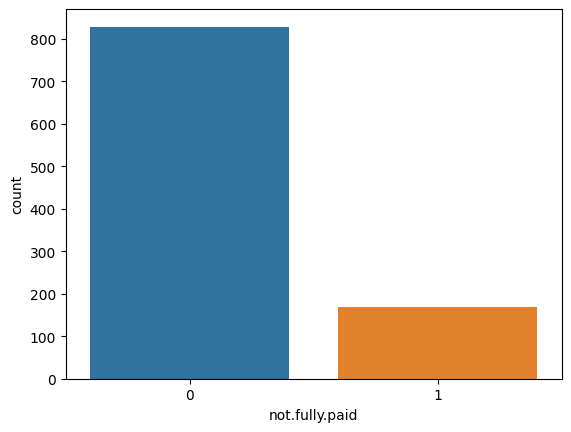

In [4]:
sns.countplot(x="not.fully.paid", data=loan_df)
plt.show()

5. Visualización de la correlación entre variables.

In [8]:
#corr = loan_df.corr()
#sns.heatmap(corr, annot=True, cmap="coolwarm")
#plt.show()

6. Comprender la distribución del propósito del préstamo.

In [ ]:
sns.countplot(x="purpose", data=loan_df)
plt.xticks(rotation=90)
plt.show()